In [28]:
import pandas as pd
from glob import glob
import os
import re
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_rel, describe, linregress

In [29]:
species_dict = {'1-SAT_S1' : 'Salmonella enterica', 
                '10-KPN_S9' : 'Klebsiella pneumoniae',
                '2-SAT_S2' : 'Salmonella enterica',
                '4-NTS_S4' : 'Salmonella enterica',
                '5-NTS_S5' : 'Salmonella enterica',
                '7-GC_S7' : 'Neisseria gonorrhoeae'}

In [30]:
pattern = re.compile(r'data\/(.+)_mixed_with_(\d+)%_(.+)\.report.tsv')

combined_df = pd.DataFrame()
for file in glob("../data/*.report.tsv"):
    # skip non-mixed files
    if not 'mixed_with' in file:
        continue
    
    result = pattern.search(file)
    # get species and mixture percent from the filename
    main_species_label = result.group(1)
    percent_contam = int(result.group(2))
    contam_species_label = result.group(3)

    df = pd.read_csv(file, sep = '\t')
    # rename columns
    df = df.rename(columns = {'name': 'observed_species', '%' : 'observed_percent_contam'})
    # strip spaces
    df['observed_species'] = df['observed_species'].str.strip()
    # filename without suffix
    df['file'] = os.path.basename(file).replace('.report.tsv', '')


    # determine expected values
    df['expected_main_species'] = species_dict[main_species_label]
    df['expected_contam_species'] = species_dict[contam_species_label]

    df['expected_percent_contam'] = percent_contam
    df['observed_percent_contam'] = df['numUniqueReads'] / df['numUniqueReads'].sum() * 100

    # remove matches to expected species
    df = df.loc[df['expected_main_species'] != df['observed_species']]


     # only include good hits
    df = df.loc[(df['taxRank'] == 'species') & (df['observed_percent_contam'] > 0.1)]

    # only retain some columns
    df = df.filter(['file', 'expected_main_species', 'expected_contam_species', 'expected_percent_contam', 'observed_species', 'observed_percent_contam'])
        
    # append to the combined dataframe
    combined_df = combined_df.append(df,  ignore_index=True)

combined_df

file  expected_main_species  \
0      1-SAT_S1_mixed_with_1%_7-GC_S7    Salmonella enterica   
1    1-SAT_S1_mixed_with_1%_10-KPN_S9    Salmonella enterica   
2      1-SAT_S1_mixed_with_5%_7-GC_S7    Salmonella enterica   
3    1-SAT_S1_mixed_with_5%_10-KPN_S9    Salmonella enterica   
4    1-SAT_S1_mixed_with_10%_4-NTS_S4    Salmonella enterica   
5     1-SAT_S1_mixed_with_10%_7-GC_S7    Salmonella enterica   
6    1-SAT_S1_mixed_with_25%_4-NTS_S4    Salmonella enterica   
7     1-SAT_S1_mixed_with_25%_7-GC_S7    Salmonella enterica   
8   1-SAT_S1_mixed_with_25%_10-KPN_S9    Salmonella enterica   
9   1-SAT_S1_mixed_with_25%_10-KPN_S9    Salmonella enterica   
10  1-SAT_S1_mixed_with_10%_10-KPN_S9    Salmonella enterica   
11    4-NTS_S4_mixed_with_1%_1-SAT_S1    Salmonella enterica   
12    4-NTS_S4_mixed_with_1%_1-SAT_S1    Salmonella enterica   
13     4-NTS_S4_mixed_with_1%_7-GC_S7    Salmonella enterica   
14     4-NTS_S4_mixed_with_1%_7-GC_S7    Salmonella enterica   
15     4-NTS_S4_mixed_with_1%_7-GC_S7    Salmonella enterica   
16    4-NTS_S4_mixed_with_5%_1-SAT_S1    Salmonella enterica   
17    4-NTS_S4_mixed_with_5%_1-SAT_S1    Salmonella enterica   
18    4-NTS_S4_mixed_with_5%_5-NTS_S5    Salmonella enterica   
19    4-NTS_S4_mixed_with_5%_5-NTS_S5    Salmonella enterica   
20     4-NTS_S4_mixed_with_5%_7-GC_S7    Salmonella enterica   
21     4-NTS_S4_mixed_with_5%_7-GC_S7    Salmonella enterica   
22     4-NTS_S4_mixed_with_5%_7-GC_S7    Salmonella enterica   
23   4-NTS_S4_mixed_with_5%_10-KPN_S9    Salmonella enterica   
24   4-NTS_S4_mixed_with_5%_10-KPN_S9    Salmonella enterica   
25   4-NTS_S4_mixed_with_10%_1-SAT_S1    Salmonella enterica   
26   4-NTS_S4_mixed_with_10%_1-SAT_S1    Salmonella enterica   
27   4-NTS_S4_mixed_with_10%_5-NTS_S5    Salmonella enterica   
28   4-NTS_S4_mixed_with_10%_5-NTS_S5    Salmonella enterica   
29    4-NTS_S4_mixed_with_10%_7-GC_S7    Salmonella enterica   
..                                ...                    ...   
63    7-GC_S7_mixed_with_25%_4-NTS_S4  Neisseria gonorrhoeae   
64    7-GC_S7_mixed_with_25%_4-NTS_S4  Neisseria gonorrhoeae   
65    7-GC_S7_mixed_with_25%_4-NTS_S4  Neisseria gonorrhoeae   
66   7-GC_S7_mixed_with_25%_10-KPN_S9  Neisseria gonorrhoeae   
67   7-GC_S7_mixed_with_25%_10-KPN_S9  Neisseria gonorrhoeae   
68   7-GC_S7_mixed_with_25%_10-KPN_S9  Neisseria gonorrhoeae   
69   10-KPN_S9_mixed_with_1%_1-SAT_S1  Klebsiella pneumoniae   
70   10-KPN_S9_mixed_with_1%_1-SAT_S1  Klebsiella pneumoniae   
71   10-KPN_S9_mixed_with_1%_4-NTS_S4  Klebsiella pneumoniae   
72   10-KPN_S9_mixed_with_1%_4-NTS_S4  Klebsiella pneumoniae   
73    10-KPN_S9_mixed_with_1%_7-GC_S7  Klebsiella pneumoniae   
74    10-KPN_S9_mixed_with_1%_7-GC_S7  Klebsiella pneumoniae   
75   10-KPN_S9_mixed_with_5%_1-SAT_S1  Klebsiella pneumoniae   
76   10-KPN_S9_mixed_with_5%_1-SAT_S1  Klebsiella pneumoniae   
77   10-KPN_S9_mixed_with_5%_4-NTS_S4  Klebsiella pneumoniae   
78   10-KPN_S9_mixed_with_5%_4-NTS_S4  Klebsiella pneumoniae   
79    10-KPN_S9_mixed_with_5%_7-GC_S7  Klebsiella pneumoniae   
80    10-KPN_S9_mixed_with_5%_7-GC_S7  Klebsiella pneumoniae   
81  10-KPN_S9_mixed_with_10%_1-SAT_S1  Klebsiella pneumoniae   
82  10-KPN_S9_mixed_with_10%_1-SAT_S1  Klebsiella pneumoniae   
83  10-KPN_S9_mixed_with_10%_4-NTS_S4  Klebsiella pneumoniae   
84  10-KPN_S9_mixed_with_10%_4-NTS_S4  Klebsiella pneumoniae   
85   10-KPN_S9_mixed_with_10%_7-GC_S7  Klebsiella pneumoniae   
86   10-KPN_S9_mixed_with_10%_7-GC_S7  Klebsiella pneumoniae   
87  10-KPN_S9_mixed_with_25%_1-SAT_S1  Klebsiella pneumoniae   
88  10-KPN_S9_mixed_with_25%_1-SAT_S1  Klebsiella pneumoniae   
89  10-KPN_S9_mixed_with_25%_4-NTS_S4  Klebsiella pneumoniae   
90  10-KPN_S9_mixed_with_25%_4-NTS_S4  Klebsiella pneumoniae   
91   10-KPN_S9_mixed_with_25%_7-GC_S7  Klebsiella pneumoniae   
92   10-KPN_S9_mixed_with_25%_7-GC_S7  Klebsiella pneumoniae   

   expected_contam_species  expected_percent_contam        obser

In [31]:
# extract matching data where observed contam matches expected
# first find rows where observed matches expected
matching = combined_df.loc[combined_df['expected_contam_species'] == combined_df['observed_species']].copy()
# exclude Salmonella results
matching = matching.loc[matching['expected_main_species'] != matching['expected_contam_species']]
# add column for deviation
matching['deviation'] = matching['expected_percent_contam'] - matching['observed_percent_contam']
matching['deviation_percent'] = (matching['expected_percent_contam'] - matching['observed_percent_contam'])/matching['expected_percent_contam']*100

matching

file  expected_main_species  \
0      1-SAT_S1_mixed_with_1%_7-GC_S7    Salmonella enterica   
1    1-SAT_S1_mixed_with_1%_10-KPN_S9    Salmonella enterica   
2      1-SAT_S1_mixed_with_5%_7-GC_S7    Salmonella enterica   
3    1-SAT_S1_mixed_with_5%_10-KPN_S9    Salmonella enterica   
5     1-SAT_S1_mixed_with_10%_7-GC_S7    Salmonella enterica   
7     1-SAT_S1_mixed_with_25%_7-GC_S7    Salmonella enterica   
9   1-SAT_S1_mixed_with_25%_10-KPN_S9    Salmonella enterica   
10  1-SAT_S1_mixed_with_10%_10-KPN_S9    Salmonella enterica   
13     4-NTS_S4_mixed_with_1%_7-GC_S7    Salmonella enterica   
20     4-NTS_S4_mixed_with_5%_7-GC_S7    Salmonella enterica   
23   4-NTS_S4_mixed_with_5%_10-KPN_S9    Salmonella enterica   
29    4-NTS_S4_mixed_with_10%_7-GC_S7    Salmonella enterica   
32  4-NTS_S4_mixed_with_10%_10-KPN_S9    Salmonella enterica   
38    4-NTS_S4_mixed_with_25%_7-GC_S7    Salmonella enterica   
42  4-NTS_S4_mixed_with_25%_10-KPN_S9    Salmonella enterica   
45     7-GC_S7_mixed_with_1%_1-SAT_S1  Neisseria gonorrhoeae   
47     7-GC_S7_mixed_with_1%_4-NTS_S4  Neisseria gonorrhoeae   
49     7-GC_S7_mixed_with_5%_4-NTS_S4  Neisseria gonorrhoeae   
51    7-GC_S7_mixed_with_5%_10-KPN_S9  Neisseria gonorrhoeae   
53     7-GC_S7_mixed_with_5%_1-SAT_S1  Neisseria gonorrhoeae   
55    7-GC_S7_mixed_with_1%_10-KPN_S9  Neisseria gonorrhoeae   
58    7-GC_S7_mixed_with_10%_4-NTS_S4  Neisseria gonorrhoeae   
60   7-GC_S7_mixed_with_10%_10-KPN_S9  Neisseria gonorrhoeae   
62    7-GC_S7_mixed_with_25%_1-SAT_S1  Neisseria gonorrhoeae   
65    7-GC_S7_mixed_with_25%_4-NTS_S4  Neisseria gonorrhoeae   
68   7-GC_S7_mixed_with_25%_10-KPN_S9  Neisseria gonorrhoeae   
70   10-KPN_S9_mixed_with_1%_1-SAT_S1  Klebsiella pneumoniae   
72   10-KPN_S9_mixed_with_1%_4-NTS_S4  Klebsiella pneumoniae   
73    10-KPN_S9_mixed_with_1%_7-GC_S7  Klebsiella pneumoniae   
76   10-KPN_S9_mixed_with_5%_1-SAT_S1  Klebsiella pneumoniae   
78   10-KPN_S9_mixed_with_5%_4-NTS_S4  Klebsiella pneumoniae   
79    10-KPN_S9_mixed_with_5%_7-GC_S7  Klebsiella pneumoniae   
82  10-KPN_S9_mixed_with_10%_1-SAT_S1  Klebsiella pneumoniae   
84  10-KPN_S9_mixed_with_10%_4-NTS_S4  Klebsiella pneumoniae   
85   10-KPN_S9_mixed_with_10%_7-GC_S7  Klebsiella pneumoniae   
88  10-KPN_S9_mixed_with_25%_1-SAT_S1  Klebsiella pneumoniae   
90  10-KPN_S9_mixed_with_25%_4-NTS_S4  Klebsiella pneumoniae   
91   10-KPN_S9_mixed_with_25%_7-GC_S7  Klebsiella pneumoniae   

   expected_contam_species  expected_percent_contam       observed_species  \
0    Neisseria gonorrhoeae                        1  Neisseria gonorrhoeae   
1    Klebsiella pneumoniae                        1  Klebsiella pneumoniae   
2    Neisseria gonorrhoeae                        5  Neisseria gonorrhoeae   
3    Klebsiella pneumoniae                        5  Klebsiella pneumoniae   
5    Neisseria gonorrhoeae                       10  Neisseria gonorrhoeae   
7    Neisseria gonorrhoeae                       25  Neisseria gonorrhoeae   
9    Klebsiella pneumoniae                       25  Klebsiella pneumoniae   
10   Klebsiella pneumoniae                       10  Klebsiella pneumoniae   
13   Neisseria gonorrhoeae                        1  Neisseria gonorrhoeae   
20   Neisseria gonorrhoeae                        5  Neisseria gonorrhoeae   
23   Klebsiella pneumoniae                        5  Klebsiella pneumoniae   
29   Neisseria gonorrhoeae                       10  Neisseria gonorrhoeae   
32   Klebsiella pneumoniae                       10  Klebsiella pneumoniae   
38   Neisseria gonorrhoeae                       25  Neisseria gonorrhoeae   
42   Klebsiella pneumoniae                       25  Klebsiella pneumoniae   
45     Salmonella enterica                        1    Salmonella enterica   
47     Salmonella enterica                        1    Salmonella enterica   
49     Salmonella enterica                        5    Salmonella enterica   
51   Klebsiella pneumoniae                        5  K

/Users/au3/.pyenv/versions/3.7.0/envs/jupyter/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


[(0, 100)]

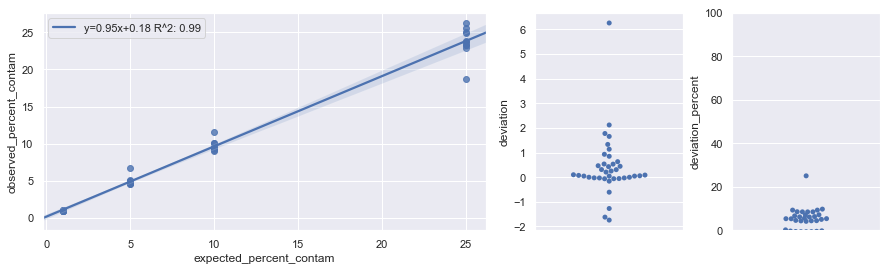

In [32]:
# plot matching data

# linear regression
slope, intercept, r_value, p_value, std_err = linregress(matching['expected_percent_contam'], matching['observed_percent_contam'])

sns.set()
f, axes = plt.subplots(1,3, figsize = [15,4], gridspec_kw  = { 'width_ratios' : [3,1,1]})
ax = sns.regplot(x="expected_percent_contam", y="observed_percent_contam", data=matching, ax=axes[0], line_kws={'label':"y={0:.2f}x+{1:.2f} R^2: {2:.2f}".format(slope,intercept, r_value)})
ax.legend()
sns.swarmplot(y="deviation", data=matching, ax=axes[1])
ax = sns.swarmplot(y="deviation_percent", data=matching, ax=axes[2])
ax.set(ylim=(0, 100))
